# Pruebas de Clase ImagePreprocessor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import random
import numpy as np
import matplotlib.image as mpimg
from pathlib import Path
import logging
import cv2

# Agrego path de root
ROOT_PATH = str(Path.cwd().parent.parent)
if ROOT_PATH not in sys.path:
    sys.path.append(ROOT_PATH)

# Path de las imagenes
IMG_DATA_PATH = Path(ROOT_PATH + "/data/raw/images/all")

# Importo e instancio ImagePreprocessor
from src.vision.preprocessor import ImagePreprocessor
logging.basicConfig(level=logging.INFO)

/home/german/Documents/ia1_2025/TrabajoFinal/trabajo-final-IA1/data/raw/images/all


In [7]:
def get_random_image(class_name: str, seed: int = None):
    class_path = IMG_DATA_PATH / class_name

    # Obtener todas las imágenes de la clase
    image_files = list(class_path.glob("*.jpg")) + list(class_path.glob("*.jpeg")) + \
                  list(class_path.glob("*.JPG")) + list(class_path.glob("*.JPEG"))

    if not image_files:
        print(f"No se encontraron imágenes en {class_path}")
        return
    
    rng = random.Random(seed) if seed is not None else random
    random_img_path = rng.choice(image_files)
    img = mpimg.imread(random_img_path)

    return random_img_path, img

In [8]:
def plot_image(image: np.ndarray, title: str = "Imagen"):
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.axis('off')
    plt.title(title)
    plt.show()

INFO:src.vision.preprocessor:✅ ImagePreprocessor inicializado correctamente


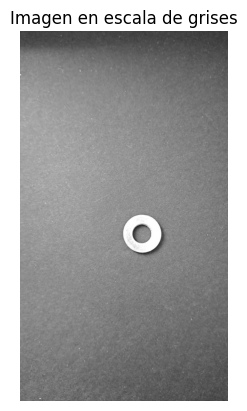

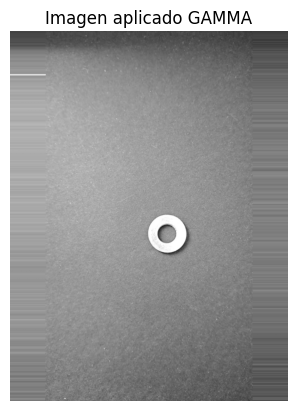

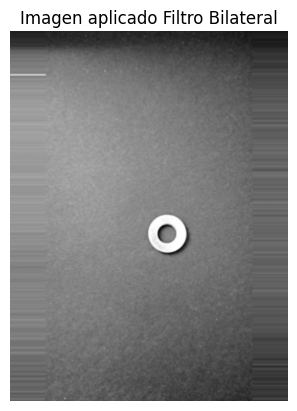

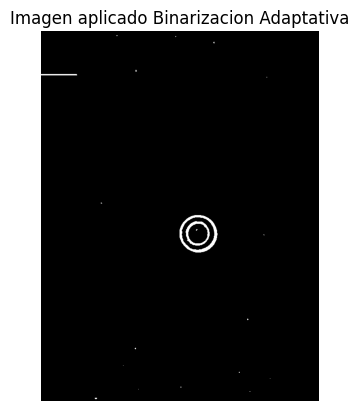

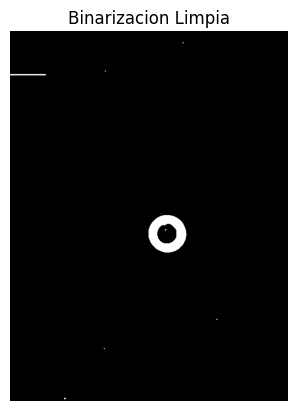

In [9]:
procesador = ImagePreprocessor(target_size = (600,800),
                                gamma = 1.8,
                                d_bFilter = 4,
                                binarization_block_size = 31,
                                binarization_C = -11,
                                open_kernel_size = (3, 3),
                                close_kernel_size = (7, 7),
                                clear_border_margin = 5)

imagen_path, random_image = get_random_image("arandelas", seed=23)
#plot_image(random_image, title="Imagen Original")

gray_image = procesador._convert_to_grayscale(random_image)
plot_image(gray_image, title="Imagen en escala de grises")

standardized_image, padding_info = procesador._standardize_size(gray_image)
#plot_image(standardized_image, title= "Imagen redimensionada a tamaño estándar")

enhanced_image = procesador._apply_gamma(standardized_image, gamma=1.5)
plot_image(enhanced_image, title="Imagen aplicado GAMMA")

blurred_image = procesador._apply_bilateral_filter(enhanced_image, procesador.d_bFilter)
plot_image(blurred_image, title="Imagen aplicado Filtro Bilateral")

binarized_image = procesador._apply_adaptive_binarization(blurred_image,
            block_size=procesador.binarization_block_size,
            C=procesador.binarizacion_C,
            threshold_type=cv2.THRESH_BINARY
        )
plot_image(binarized_image, title="Imagen aplicado Binarizacion Adaptativa")

cleaned_image = procesador._clean_binarization(
            binarized_image,
            open_kernel_size=procesador.open_kernel_size,
            close_kernel_size=procesador.close_kernel_size
        )
plot_image(cleaned_image, title="Binarizacion Limpia")


INFO:src.vision.preprocessor:✅ ImagePreprocessor inicializado correctamente


📸 Procesando imágenes aleatorias...


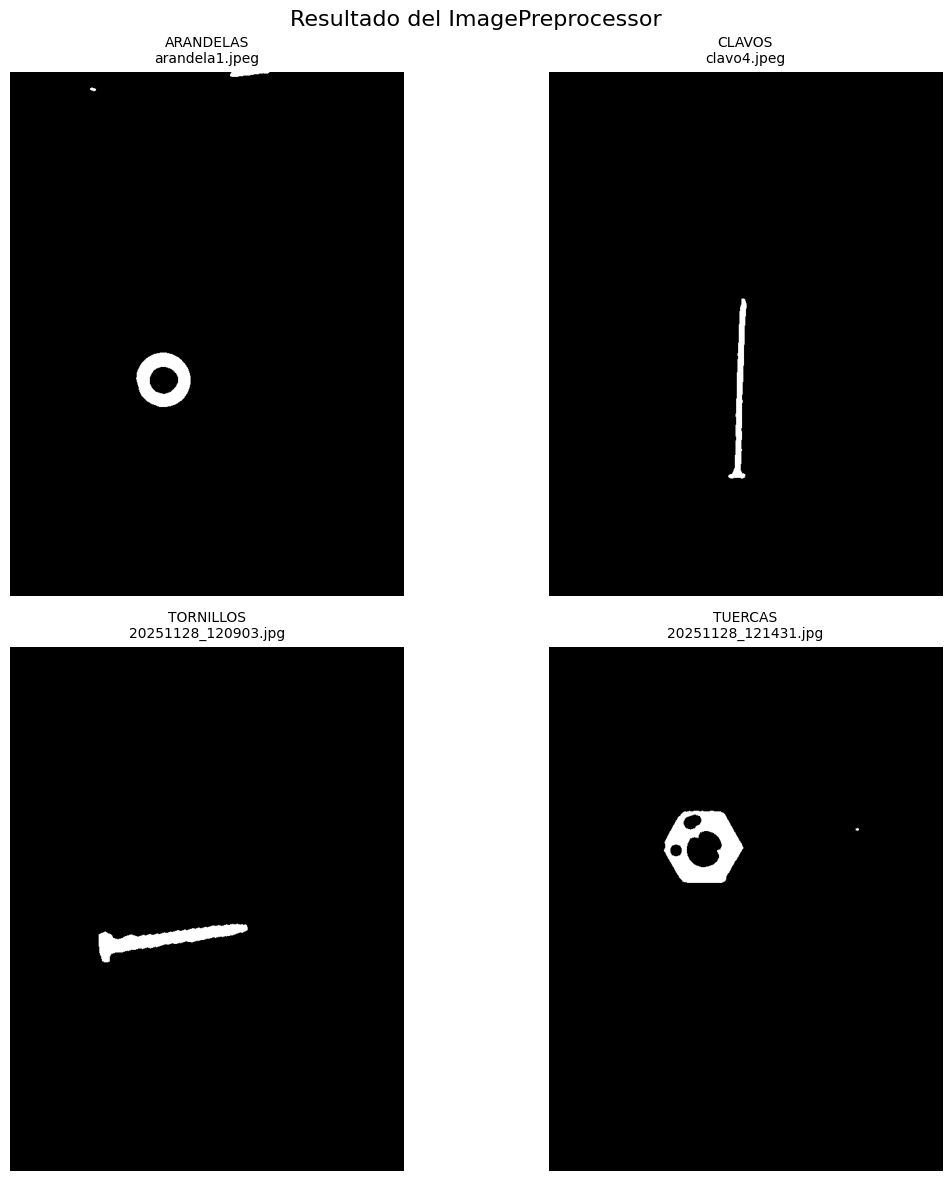

In [11]:
def get_random_image(category, base_path="data/raw/images/all"):
    """
    Busca una imagen aleatoria de una categoría específica.
    Retorna: (path_absoluto, imagen_cv2)
    """
    dir_path = os.path.join(base_path, category)
    if not os.path.exists(dir_path):
        print(f"❌ Error: No existe el directorio {dir_path}")
        return None, None
        
    files = [f for f in os.listdir(dir_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if not files:
        print(f"⚠️ No hay imágenes en {category}")
        return None, None
        
    random_file = random.choice(files)
    full_path = os.path.join(dir_path, random_file)
    
    # Cargar imagen (OpenCV carga en BGR por defecto)
    image = cv2.imread(full_path)
    return full_path, image

def visualize_preprocessing():
    # 1. Configuración
    base_path = IMG_DATA_PATH
    categories = ["arandelas", "clavos", "tornillos", "tuercas"]
    
    #! Instanciamos preprocesador. ESTOS SON LOS VALORES FINALES!
    preprocessor = ImagePreprocessor(target_size = (600,800),
                                gamma = 1.7,
                                d_bFilter = 5,
                                binarization_block_size = 31,
                                binarization_C = -11,
                                open_kernel_size = (5, 5),
                                close_kernel_size = (9, 9),
                                clear_border_margin = 5)
    
    # 2. Configurar el Gráfico (2 filas, 2 columnas)
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Resultado del ImagePreprocessor', fontsize=16)
    axes_flat = axes.flatten()

    print("📸 Procesando imágenes aleatorias...")

    for i, category in enumerate(categories):
        ax = axes_flat[i]
        
        # Obtener imagen
        path, raw_img = get_random_image(category, base_path)
        
        if raw_img is None:
            ax.text(0.5, 0.5, "Sin imagen", ha='center')
            continue
            
        # --- PROCESAMIENTO ---
        processed_binary = preprocessor.process(raw_img)
        
        # Mostrar imagen
        # cmap='gray' es vital porque la imagen binarizada es de 1 solo canal
        ax.imshow(processed_binary, cmap='gray')
        
        # Decoración
        filename = os.path.basename(path)
        ax.set_title(f"{category.upper()}\n{filename}", fontsize=10)
        ax.axis('off') # Quitar ejes X e Y para limpieza

    # Ajustar espacios para que no se solapen los textos
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_preprocessing()